## Clustering Analysis

In [76]:
import pandas as pd
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt
import matplotlib
import scipy.cluster.hierarchy as sch

from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [2]:
ct_info_cases_df = pd.read_csv("Statistical_Analysis/data/ct_info_cases_data.csv")
ct_info_cases_df = ct_info_cases_df[['GEOID', 'income',
                                     'exposure1',
                                     'exposure2',
                                     'exposure3',
                                     'exposure4', 
                                     'estimate_cases1_density',
                                     'estimate_cases2_density',
                                     'estimate_cases3_density',
                                     'estimate_cases4_density',
                                     'POPULATION', 'POP_DENSITY']]
ct_info_cases_df = ct_info_cases_df.fillna(0)
# ct_info_cases_df = ct_info_cases_df[ct_info_cases_df['GEOID'] != 17031030702]

In [122]:
features_clustering_on = ['income', 'POP_DENSITY']

In [123]:
num_clusters = [2,3,4,5,6,7,8,9,10]
sc_score_list = []
for num in num_clusters:
    AC = AgglomerativeClustering(
    #     distance_threshold=0, # setting distance_threshold=0 ensures we compute the full tree.
        n_clusters=num,
        linkage='complete')

    AC_model = AC.fit(ct_info_cases_df[features_clustering_on])
    sc_score = silhouette_score(ct_info_cases_df[features_clustering_on],
                                AC_model.labels_, metric = 'euclidean')
    sc_score_list.append(sc_score)
sc_score_list

[0.5776967581983132,
 0.5220607153858352,
 0.4988639646749516,
 0.5047044609670361,
 0.4910178097470844,
 0.4752877051415331,
 0.4736638334697846,
 0.46589331751763685,
 0.4616686432301756]

In [140]:
AC = AgglomerativeClustering(
#     distance_threshold=0, # setting distance_threshold=0 ensures we compute the full tree.
    n_clusters=5,
    linkage='complete')

AC_model = AC.fit(ct_info_cases_df[features_clustering_on])

In [141]:
# disMat = sch.distance.pdist(X = ct_info_cases_df[['income','POP_DENSITY']], metric = 'euclidean')
# Z = sch.linkage(disMat, method = 'ward')
# p = sch.dendrogram(Z, labels = ct_info_cases_df.GEOID.tolist())
# plt.title('Hierarchical Clustering Dendrogram')
# plt.savefig('Clustering Dendrogram')

In [191]:
labels = AC_model.labels_
ct_info_cases_df['label'] = labels
# ct_info_cases_df

In [192]:
for GEOID in [17093890700, 17093890400, 17031804507, 17089850701, 17043846411, 17043841703, 17043846310, 17031803608, 17031806002, 17031320100, 17031330100, 17093890101]:
    print(GEOID, ct_info_cases_df[ct_info_cases_df['GEOID']==GEOID]['label'])


17093890700 31    3
Name: label, dtype: int64
17093890400 33    3
Name: label, dtype: int64
17031804507 892    0
Name: label, dtype: int64
17089850701 1153    3
Name: label, dtype: int64
17043846411 1331    3
Name: label, dtype: int64
17043841703 1476    2
Name: label, dtype: int64
17043846310 1495    4
Name: label, dtype: int64
17031803608 1830    3
Name: label, dtype: int64
17031806002 1900    4
Name: label, dtype: int64
17031320100 2520    0
Name: label, dtype: int64
17031330100 2543    1
Name: label, dtype: int64
17093890101 2912    0
Name: label, dtype: int64


In [193]:
df_means = pd.DataFrame(columns=['income', 
                                 'exposure1', 'exposure2', 'exposure3', 'exposure4',
                                 'estimate_cases1_density', 'estimate_cases2_density',
                                 'estimate_cases3_density', 'estimate_cases4_density',
                                 'POPULATION', 'POP_DENSITY', 'label'])
# # for cluster in labels.uniuqe():

for num in range(5):
    income = np.mean(ct_info_cases_df.iloc[labels == num]['income'])
    exposure1 = np.mean(ct_info_cases_df.iloc[labels == num]['exposure1'])
    exposure2 = np.mean(ct_info_cases_df.iloc[labels == num]['exposure2'])
    exposure3 = np.mean(ct_info_cases_df.iloc[labels == num]['exposure3'])
    exposure4 = np.mean(ct_info_cases_df.iloc[labels == num]['exposure4'])
    estimate_cases1_density = np.mean(ct_info_cases_df.iloc[labels == num]['estimate_cases2_density'])
    estimate_cases2_density = np.mean(ct_info_cases_df.iloc[labels == num]['estimate_cases2_density'])
    estimate_cases3_density = np.mean(ct_info_cases_df.iloc[labels == num]['estimate_cases3_density'])
    estimate_cases4_density = np.mean(ct_info_cases_df.iloc[labels == num]['estimate_cases4_density'])
    POPULATION = np.mean(ct_info_cases_df.iloc[labels == num]['POPULATION'])
    POP_DENSITY = np.mean(ct_info_cases_df.iloc[labels == num]['POP_DENSITY'])
    label = np.mean(ct_info_cases_df.iloc[labels == num]['label'])
    df_means.append([income, POPULATION, POP_DENSITY,
                     exposure1, exposure2, exposure3, exposure4,
                     estimate_cases1_density, estimate_cases2_density, 
                     estimate_cases3_density, estimate_cases4_density,
                     label])

    new_row = pd.DataFrame({'income':[income], 'POP_DENSITY':[POP_DENSITY], 'POPULATION':[POPULATION],
                            'exposure1':[exposure1], 'exposure2':[exposure2], 'exposure3':[exposure3], 'exposure4':[exposure4],
                        'estimate_cases1_density':[estimate_cases1_density], 'estimate_case2_density':[estimate_cases2_density],
                            'estimate_cases3_density':[estimate_cases3_density], 'estimate_cases4_density':[estimate_cases4_density],
                        'label':[label]})
    df_means = df_means.append(new_row)
# df_means

In [194]:
df_means[['income', 'POPULATION', 'POP_DENSITY', 
          'estimate_cases1_density', 'estimate_cases2_density','estimate_cases3_density', 'estimate_cases4_density',
          'exposure1', 'exposure2', 'exposure3', 'exposure4', 'label']]

,income,POPULATION,POP_DENSITY,estimate_cases1_density,estimate_cases2_density,estimate_cases3_density,estimate_cases4_density,exposure1,exposure2,exposure3,exposure4,label
0,125406.183894,4658.872549,13.933351,94.372254,NaN,110.626805,250.740795,0.000676,0.000432,0.000761,0.000719,0.0
0,174789.693167,4117.986111,22.104494,170.262553,NaN,199.246420,433.610440,0.001411,0.000828,0.001446,0.000698,1.0
0,30626.048604,3331.368693,17.878952,130.985251,NaN,154.099473,360.516617,0.000151,0.000098,0.000175,0.000165,2.0
0,87029.959207,4574.786432,9.690191,59.199863,NaN,69.665737,163.854936,0.000381,0.000260,0.000468,0.000511,3.0
0,61143.289397,4054.973251,10.625055,70.867074,NaN,83.505126,196.764088,0.000232,0.000146,0.000262,0.000274,4.0


In [195]:
# read the illinois state shp data
illinois_shp = gpd.read_file('raw_il_census_tracts_shapefile/tl_2019_17_tract.shp')
illinois_shp = illinois_shp.loc[:,('GEOID','geometry')]
illinois_shp['centroid'] = illinois_shp.centroid.to_crs(epsg = 4326)
# illinois_shp = pd.DataFrame(illinois_shp)
# illinois_shp

/var/folders/mj/yy94wkqj1x73mgydrb1dzrqm0000gn/T/ipykernel_64309/1201419792.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  illinois_shp['centroid'] = illinois_shp.centroid.to_crs(epsg = 4326)


In [196]:
ct_info_cases_df['GEOID_']='1'
for i in range(ct_info_cases_df.shape[0]):    
    ct_info_cases_df['GEOID_'][i] = str(ct_info_cases_df['GEOID'][i])
# ct_info_cases_df = ct_info_cases_df[['GEOID','exposure1','exposure2','exposure3','exposure4']]

type(ct_info_cases_df['GEOID_'][0])

/var/folders/mj/yy94wkqj1x73mgydrb1dzrqm0000gn/T/ipykernel_64309/760170623.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_info_cases_df['GEOID_'][i] = str(ct_info_cases_df['GEOID'][i])


str

In [197]:
illinois_shp = pd.merge(illinois_shp, ct_info_cases_df, how='left', left_on="GEOID", right_on = "GEOID_")

In [198]:
def drawCluster(col):
    cluster_map = illinois_shp.plot(
        column = col,
#         cmap = 'Reds',
        edgecolor = 'black',
        linewidth = 0.5,
        alpha = 0.9, 
        legend = True,
        figsize = (100,100),
                     )
    cluster_map.axis('off')

In [199]:
df_means[['income', 'POPULATION', 'POP_DENSITY', 'estimate_cases4_density', 'exposure1', 'exposure4', 'label']]

,income,POPULATION,POP_DENSITY,estimate_cases4_density,exposure1,exposure4,label
0,125406.183894,4658.872549,13.933351,250.740795,0.000676,0.000719,0.0
0,174789.693167,4117.986111,22.104494,433.610440,0.001411,0.000698,1.0
0,30626.048604,3331.368693,17.878952,360.516617,0.000151,0.000165,2.0
0,87029.959207,4574.786432,9.690191,163.854936,0.000381,0.000511,3.0
0,61143.289397,4054.973251,10.625055,196.764088,0.000232,0.000274,4.0


:find regions to take a closer look for goverment \ intervans 

higher exposure not -> higher case density ? why

how other 2 papers draw conclusions based on the cluster analysis

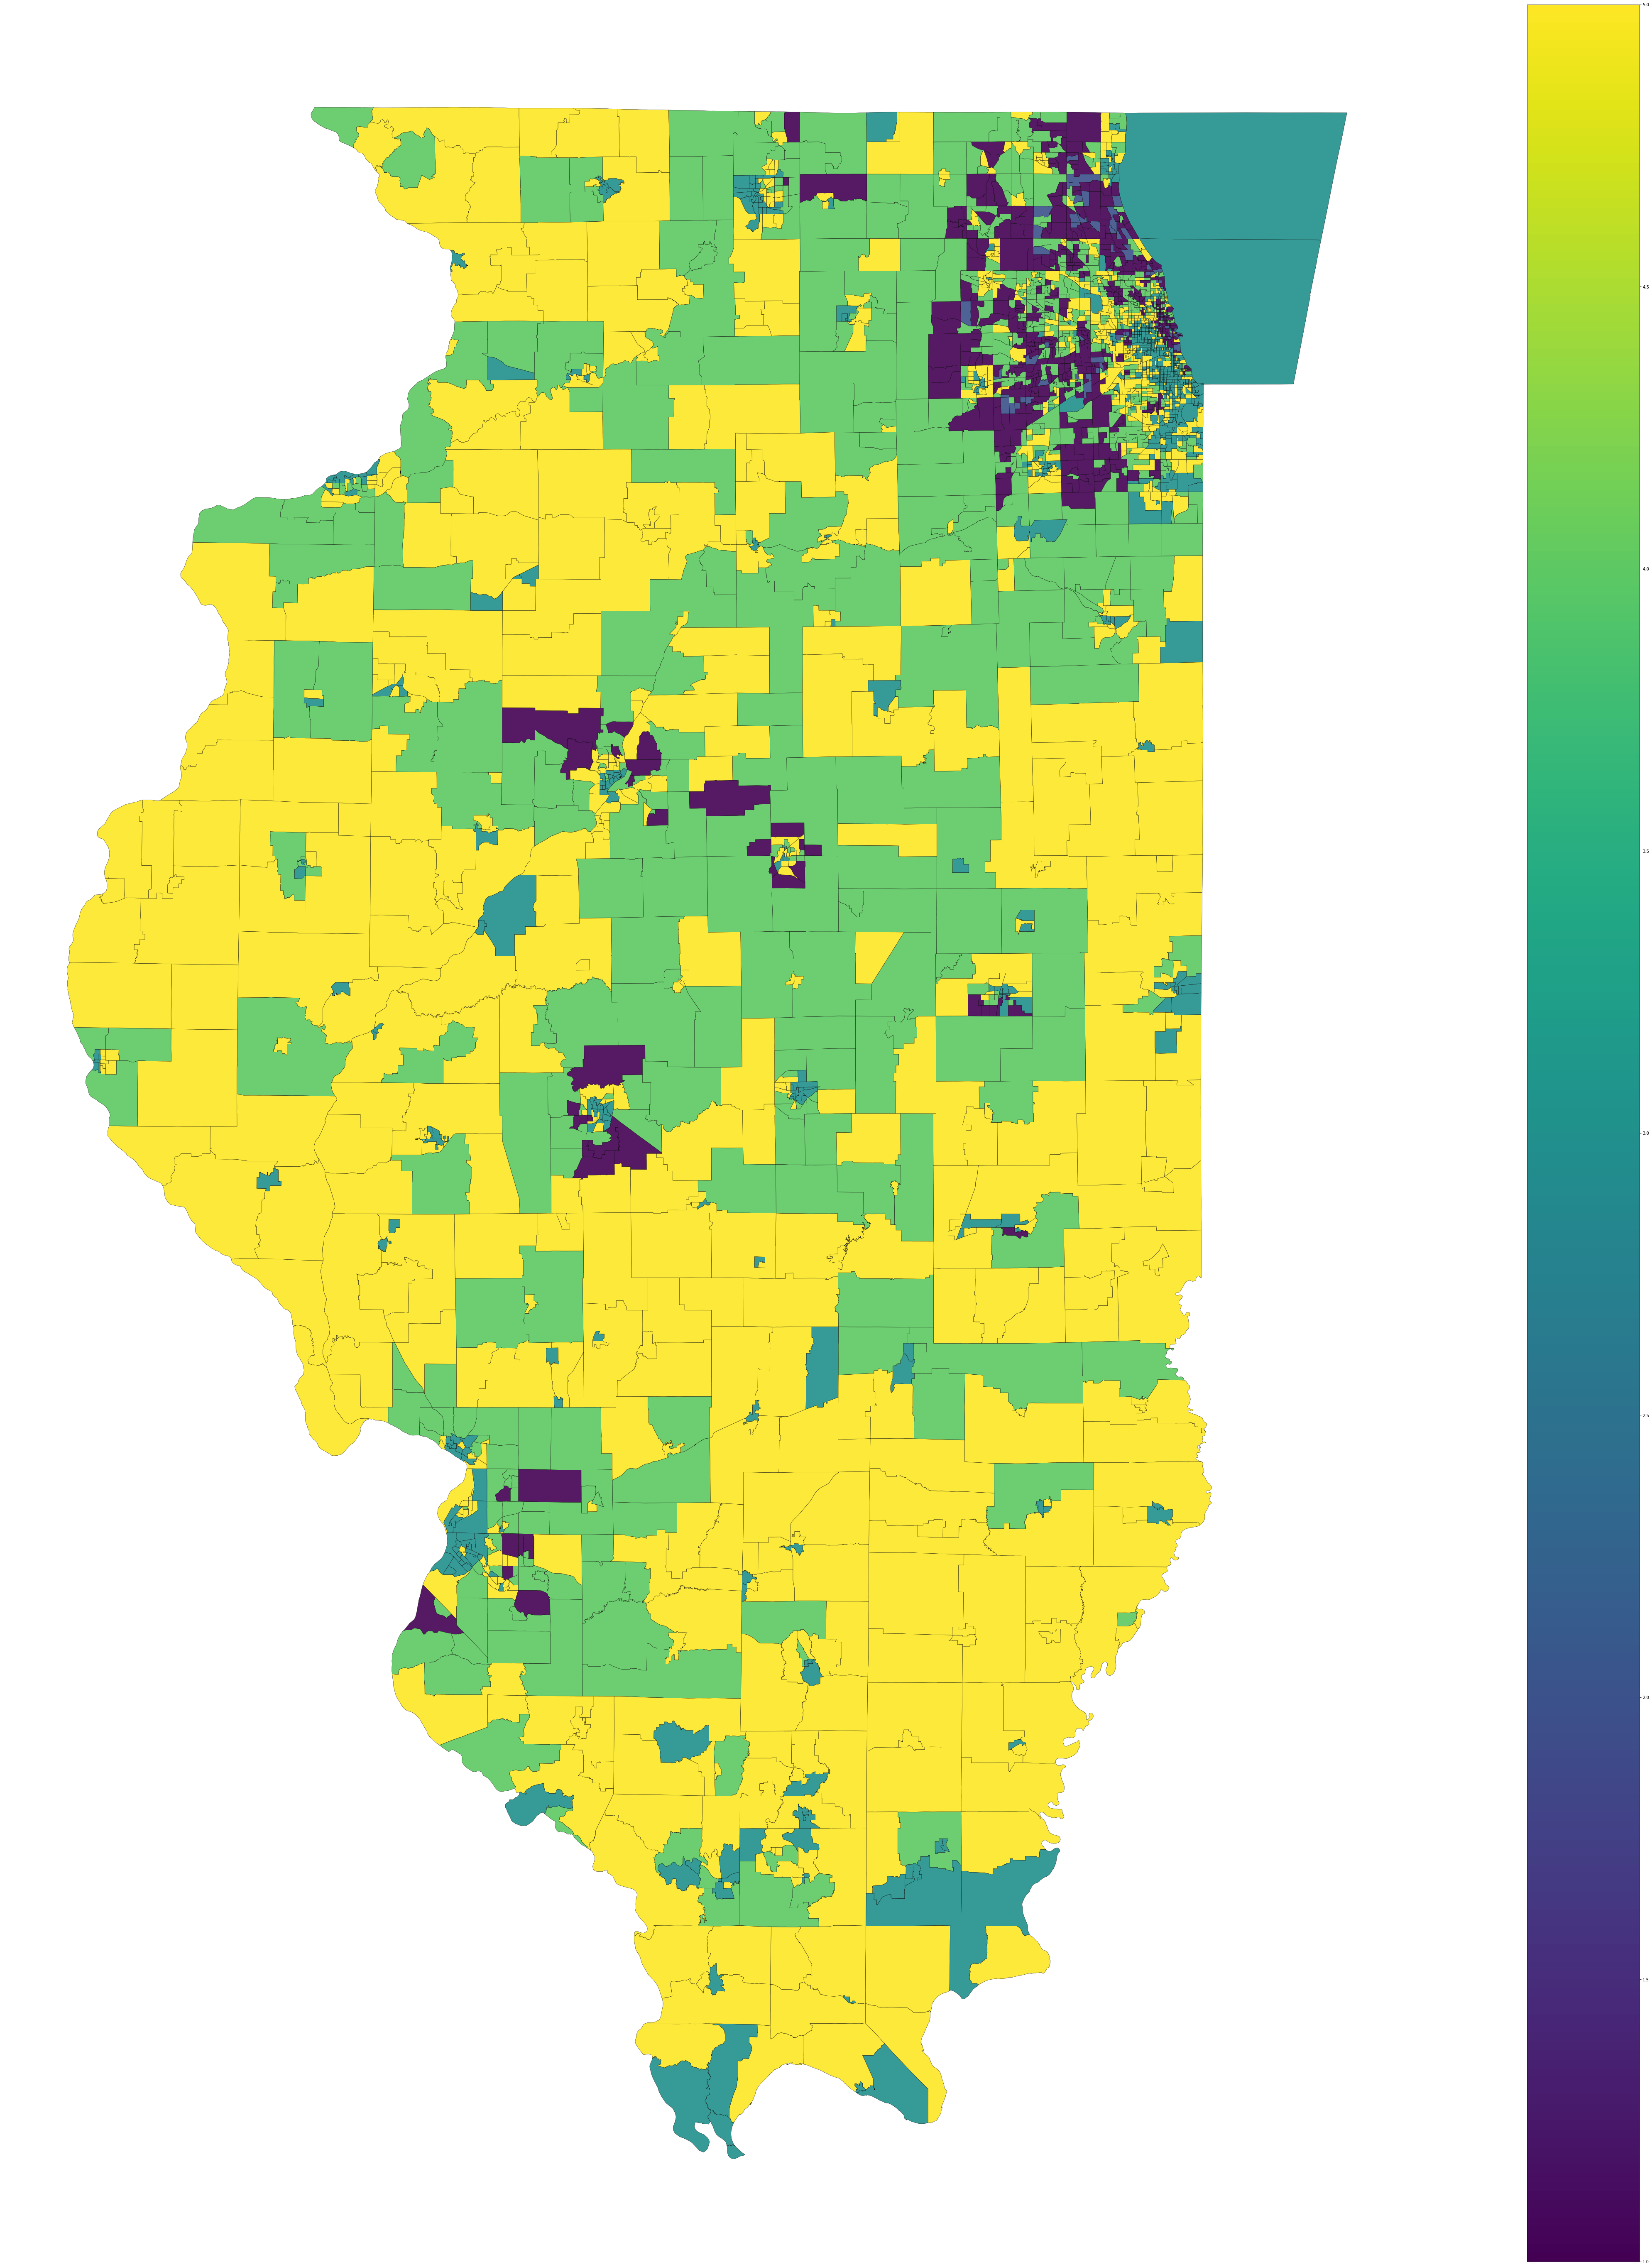

In [187]:
drawCluster(col = "label")
plt.savefig('/Users/zhangyuqi/Desktop/Clustering Map.jpg')

In [188]:
for i in range(5):  
    print(len(ct_info_cases_df[ct_info_cases_df['label'] == i]))

0
510
72
773
796


purple 0 - highest population density, lowest income
green 1 and yellow 2: lower population density, higher income

    

In [200]:
ct_info_cases_df[ct_info_cases_df['label'] == 2]

,GEOID,income,exposure1,exposure2,exposure3,exposure4,estimate_cases1_density,estimate_cases2_density,estimate_cases3_density,estimate_cases4_density,POPULATION,POP_DENSITY,label,GEOID_
0,17091011700,20571.874,0.000026,0.000072,0.000161,0.000187,0.032914,27.812121,39.726899,124.611467,3417,7.059873,2,17091011700
6,17119401500,45088.228,0.000005,0.000008,0.000018,0.000064,0.007228,3.700690,6.244915,54.874297,2763,6.071527,2,17119401500
13,17161024400,27603.337,0.000000,0.000000,0.000000,0.000000,0.000000,7.662169,11.002089,54.261418,1943,5.341525,2,17161024400
16,17119401701,37553.858,0.000005,0.000009,0.000019,0.000067,0.002169,1.110323,1.873669,16.464003,2570,1.608621,2,17119401701
23,17135957700,43096.332,0.000000,0.000000,0.000000,0.000000,0.000000,1.373774,1.549899,23.635962,3103,1.751835,2,17135957700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054,17043846603,43828.109,0.000560,0.000233,0.000403,0.000444,0.609936,77.601014,91.618847,268.147243,4261,16.080131,2,17043846603
3079,17157951200,42450.000,0.000000,0.000000,0.000000,0.000000,0.000000,1.003643,1.052878,5.256817,6422,0.438932,2,17157951200
3081,17055040700,42646.985,0.000000,0.000000,0.000000,0.000000,0.000000,0.062760,0.073220,5.753000,4426,2.688054,2,17055040700
3085,17055041100,38860.088,0.000000,0.000000,0.000000,0.000000,0.000000,0.155995,0.181994,14.299536,3563,2.482733,2,17055041100


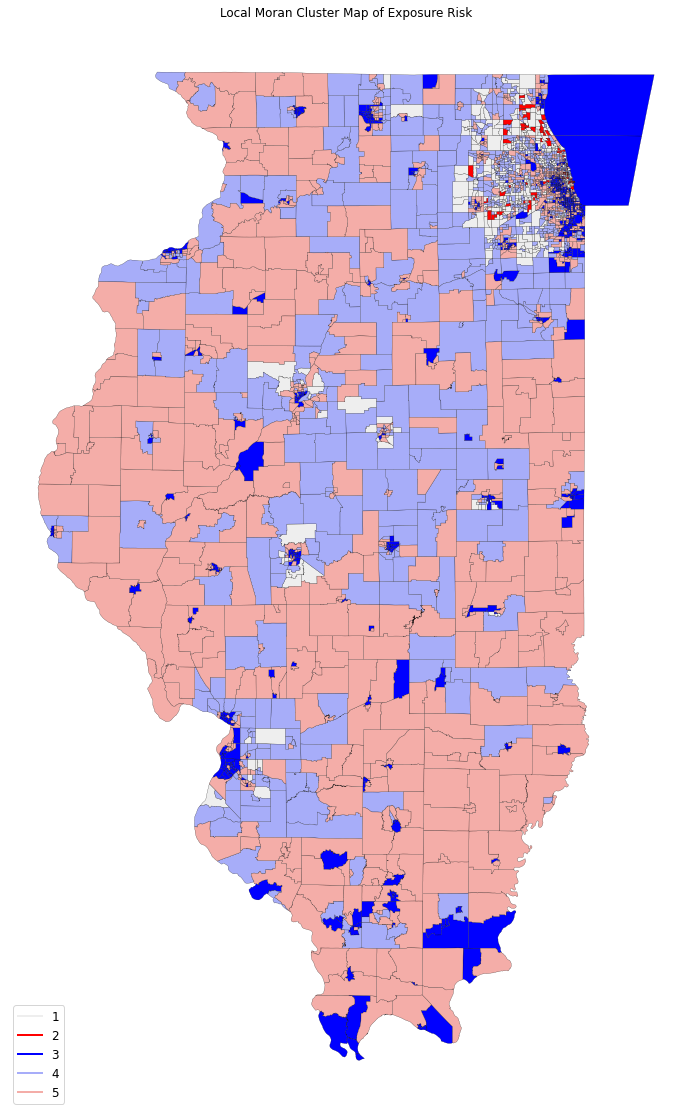

In [202]:
fig, ax = plt.subplots(figsize = (15,20))
lisa_colors = [ '#eeeeee', '#FF0000', '#0000FF', '#a7adf9','#f4ada8']
lisa_labels = [1,2,3,4,5]

# attach LISA cluster indicators to geodataframe
# illinois_shp['label'] = lm.lisa_clusters()

for ctype, data in illinois_shp.groupby('label'):
    color = lisa_colors[ctype]
    lbl = lisa_labels[ctype]
    data.plot(color = color,
        ax = ax,
        label = lbl,
        edgecolor = 'black',
        linewidth = 0.2)

# Place legend in the lower right hand corner of the plot
lisa_legend = [matplotlib.lines.Line2D([0], [0], color=color, lw=2) for color in lisa_colors]
ax.legend(lisa_legend, lisa_labels,loc='lower left', fontsize=12, frameon=True)
ax.set(title='Local Moran Cluster Map of Exposure Risk')
ax.set_axis_off()